之前训练树模型只采用了1W/4000W 样本量，因为在大数据集上训练一棵树的计算代价极大，耗时很长。

**有了one-hot encoding，我们可用的算法不再受 categorical features 的限制，我们可以采用一个对大数据集有高扩展性的算法。**

Logistic Regression 就是最具扩展性的算法之一。

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Logistic function

In [2]:
import numpy as np
def sigmoid(input):
    return 1.0/(1+np.exp(-input))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.YTick at 0x1188e2748>,
 <a list of 5 Text yticklabel objects>)

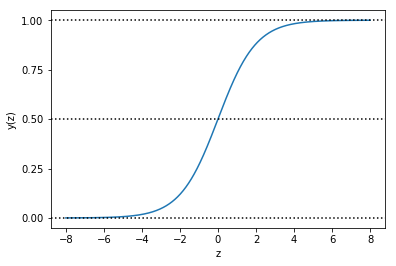

In [4]:
z = np.linspace(-8,8,1000)
y = sigmoid(z)
plt.plot(z,y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

所有inputs 都被转换为0-1之间。对于正input，值越大，output越接近1；负input，值越小，output越接近0；

若input=0，则output=0.5

# Logistic Regression

在Logistic Regression 中，input z 是features的加权和：
![linear](z1.png)
有时模型会有intercept，也叫bias，W0:
![linear+bias](plus_bias.png)

所有output都在[0,1]之间，表示目标为‘1’的概率值，或者分为正类的概率值：
![probability](probability.png)
因此，LR是一种概率分类器，类似朴素贝叶斯分类器。

LR模型：从训练集中学得权值向量w，使得预测结果中，正样本尽可能接近1，负样本尽可能接近0。

数学描述是，代价函数为均方误差MSE，训练出一个w使MSE最小:
![cost_function](cost_function_MSE.png)

问题是，这个代价函数是非凸的，意味着寻找的最佳w很可能只是局部最优，并不能收敛到全局最优:
![local optimum](non_convex.png)

## 为此，实务中的代价函数常定义为如下的Log Loss：
![cost_funtion](cost_function_T.png)

对于y_i=1:

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


(0, 1)

(0, 7)

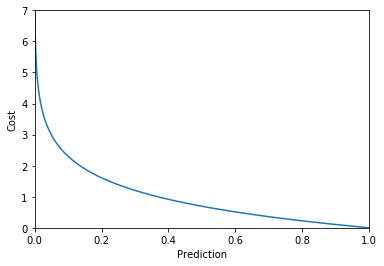

In [5]:
y_hat = np.linspace(0, 1, 1000)
cost = -np.log(y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0,1)
plt.ylim(0,7)
plt.show()

若预测正确，则cost=0；预测正确的可能性越低，离1越远，cost 越高，预测为0则cost无限大.

如果y_i=0:

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


(0, 1)

(0, 7)

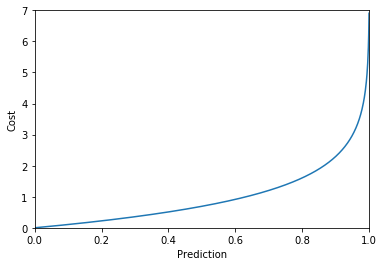

In [6]:
y_hat = np.linspace(0, 1, 1000)
cost = -np.log(1-y_hat)
plt.plot(y_hat,cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0,1)
plt.ylim(0,7)
plt.show()

最小化Log Loss实际上等价于最小化基于MSE的代价函数。选择Log Loss作为代价函数的好处是：

    凸函数，能找到全局最优的w；
    log 方便计算。